In [40]:
import sys
sys.path.append("../scripts")
from robot import *
from scipy.stats import multivariate_normal

In [41]:
class Particle:
    
    def __init__(self,init_pose):
        self.pose = init_pose
        
    def motion_update(self,nu,omega, time, noise_rate_pdf):
        
        ns =noise_rate_pdf.rvs()
        noised_nu =nu+ns[0]*math.sqrt(abs(nu)/time)+ns[1]*math.sqrt(abs(omega)/time)
        noised_omega =omega + ns[2]*math.sqrt(abs(nu)/time)+ns[3]*math.sqrt(abs(omega)/time)
        self.pose = VRobot.state_transition(noised_nu,noised_omega,time,self.pose)
        

In [48]:
class Mcl:
    
    def __init__(self,init_pose,num,motion_noise_stds={"nn":0.19, "no":0.001, "on":0.13, "oo":0.2}):
        
        self.particles=[Particle(init_pose) for i in range(num)]
        v= motion_noise_stds
        c= np.diag([v["nn"]**2,v["no"]**2,v["on"]**2,v["oo"]**2])
        self.motion_noise_rate_pdf = multivariate_normal(cov=c)
        
    def motion_update(self, nu,omega, time):
        
        for p in self.particles:
            p.motion_update(nu,omega, time, self.motion_noise_rate_pdf)
        
    def draw(self,ax,elems):
        
        xs = [p.pose[0] for p in self.particles]
        ys = [p.pose[1] for p in self.particles]
        vxs=[math.cos(p.pose[2]) for p in self.particles]
        vys=[math.sin(p.pose[2]) for p in self.particles]
        elems.append(ax.quiver(xs,ys,vxs,vys,color="blue",alpha=0.5))

In [49]:
class EstimationAgent(Agent):
    def __init__(self,time_interval,nu,omega,estimator):
        super().__init__(nu,omega)
        self.time_interval= time_interval
        self.estimator = estimator
        self.prev_nu=0.0
        self.prev_omega=0.0
    
    def decision(self,observation=None):
        self.estimator.motion_update(self.prev_nu,self.prev_omega, self.time_interval)
        self.prev_nu,self.prev_omega = self.nu,self.omega
        return self.nu,self.omega
    
    def draw(self,ax,elems):
        self.estimator.draw(ax,elems)
        

<IPython.core.display.Javascript object>


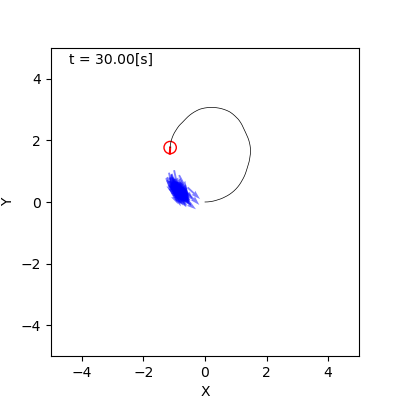

In [34]:
def trial(motion_noise_stds):
    
    time_interval= 0.1
    world = VWorld(30,time_interval)
    
    initial_pose = np.array([0,0,0]).T
    estimator = Mcl(initial_pose, 100,motion_noise_stds)
    circling =EstimationAgent(time_interval,0.2,10.0/180*math.pi,estimator)
    r= Robot(initial_pose,sensor=None,agent=circling,color="red")
    world.append(r)
    world.draw()
    
trial({"nn":0.01,"no":0.02,"on":0.03,"oo":0.04})

<IPython.core.display.Javascript object>


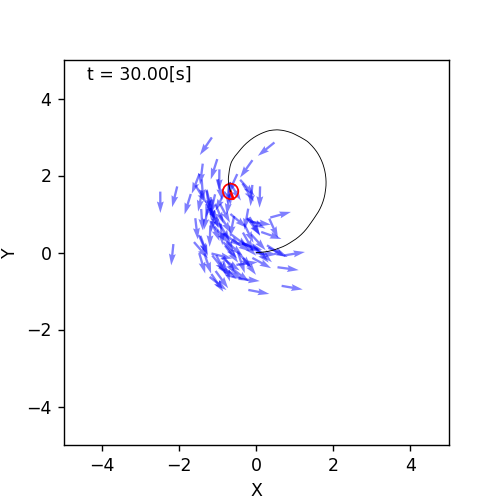

In [50]:
time_interval = 0.1  ###draw_mcl7###
world = VWorld(30, time_interval, debug=False) 

initial_pose = np.array([0, 0, 0]).T
estimator = Mcl(initial_pose, 100)
circling = EstimationAgent(time_interval, 0.2, 10.0/180*math.pi, estimator)
r = Robot(initial_pose, sensor=None, agent=circling, color="red" )
world.append(r)

world.draw()

<IPython.core.display.Javascript object>


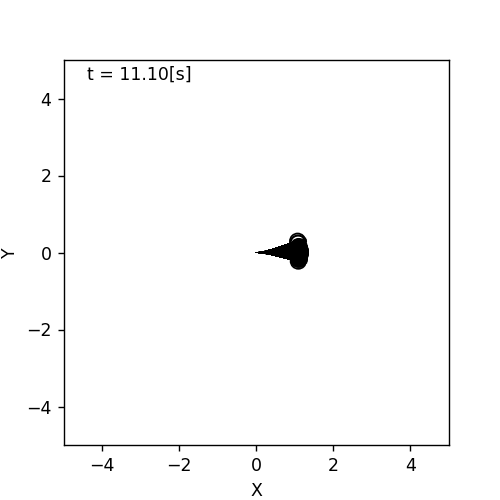

In [51]:
world =VWorld(40,0.1)


initial_pose = np.array([0, 0, 0]).T
robots = []
r = Robot(initial_pose, sensor=None, agent=Agent(0.1, 0.0)) 

for i in range(100):
    copy_r = copy.copy(r)
    copy_r.distance_until_noise = copy_r.noise_pdf.rvs() #最初に雑音が発生するタイミングを変える
    world.append(copy_r)     #worldに登録することでアニメーションの際に動く
    robots.append(copy_r)   #オブジェクトの参照のリストにロボットのオブジェクトを登録
world.draw()


<IPython.core.display.Javascript object>


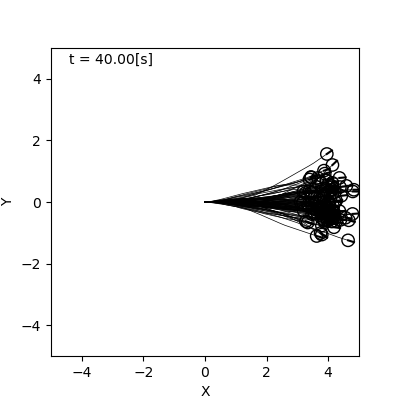

In [39]:
world = VWorld(40,0.1)
initial_pose = np.array([0, 0, 0]).T
robots = []


for i in range(100):
    r = Robot(initial_pose, sensor=None, agent=Agent(0.1, 0.0)) 
    world.append(r)     #worldに登録することでアニメーションの際に動く
    robots.append(r)   #オブジェクトの参照のリストにロボットのオブジェクトを登録
world.draw()


<IPython.core.display.Javascript object>


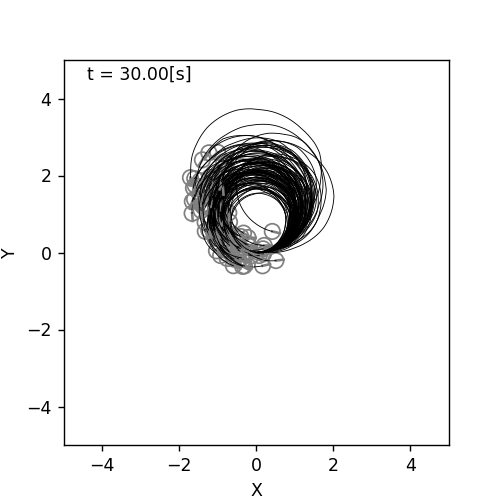

In [47]:
time_interval = 0.1  ###draw_mcl7###
world = VWorld(30, time_interval) 

for i in range(100):
    r = Robot(np.array([0, 0, 0]).T, sensor=None, agent=Agent(0.2, 10.0/180*math.pi), color="gray" )
    world.append(r)

world.draw()